In [2]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [3]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [4]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"res2dinv_inputs/ERT_eastern_perpendicular_gps.Dat")
data

21/05/24 - 11:20:40 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 48 data: 565, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

21/05/24 - 11:20:43 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
21/05/24 - 11:20:53 - pyGIMLi - INFO - Save RVector binary
21/05/24 - 11:20:53 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6993961149240504153
21/05/24 - 11:20:53 - pyGIMLi - INFO - Save RVector binary
21/05/24 - 11:20:53 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\1138300152253219453


565 [31.17637906715629,...,31.30948139190483]

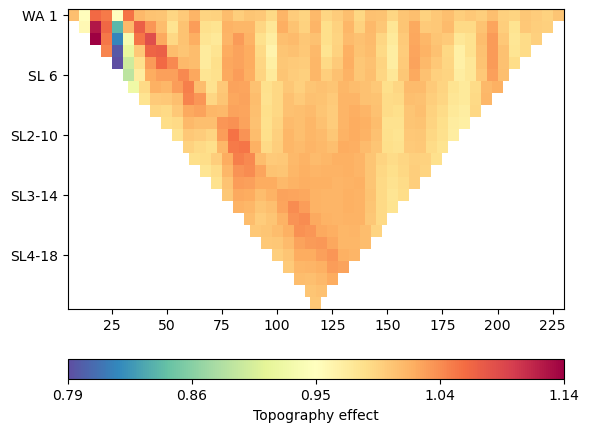

In [5]:
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21bf9ab8690>)

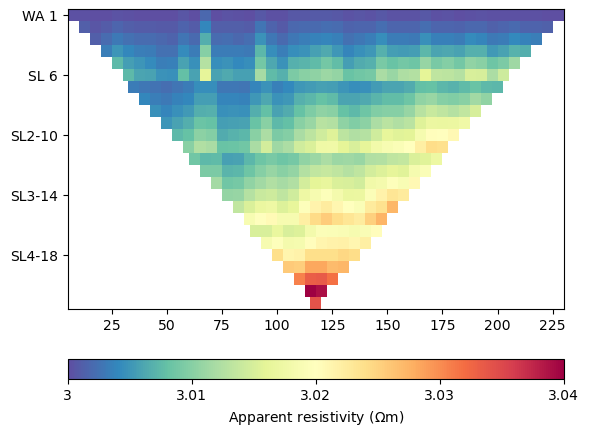

In [6]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21bf892d750>)

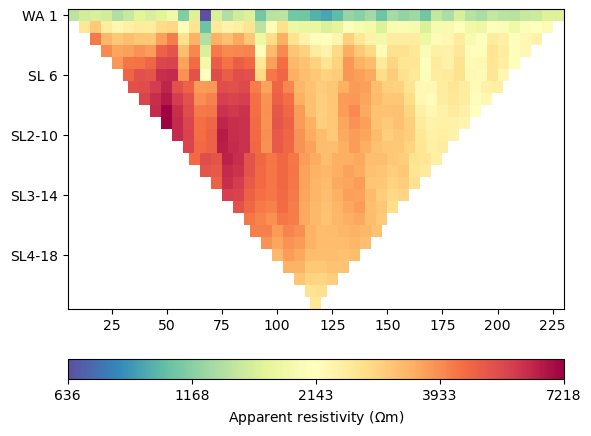

In [7]:
ert.showData(data)

21/05/24 - 13:42:59 - pyGIMLi - INFO - Use median(data values)=3195.34009
21/05/24 - 13:42:59 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
21/05/24 - 13:42:59 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021BF99C4900>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000021BF99D4950>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000021BF99D48B0>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  174.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   23.80 (dPhi = 85.50%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.78 (dPhi = 71.67%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.10 (dPhi = 24.37%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.83 (dPhi = 3.99%) lam: 20.0
---------------

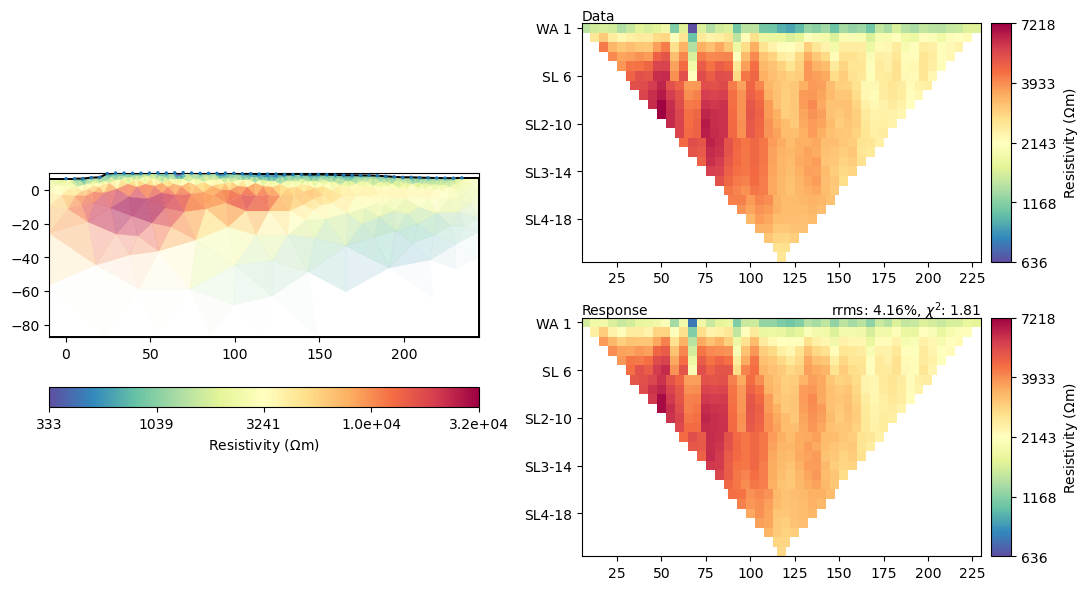

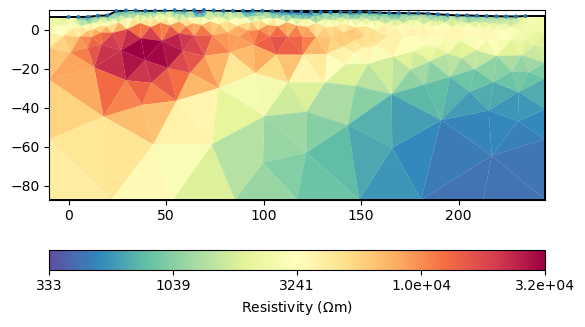

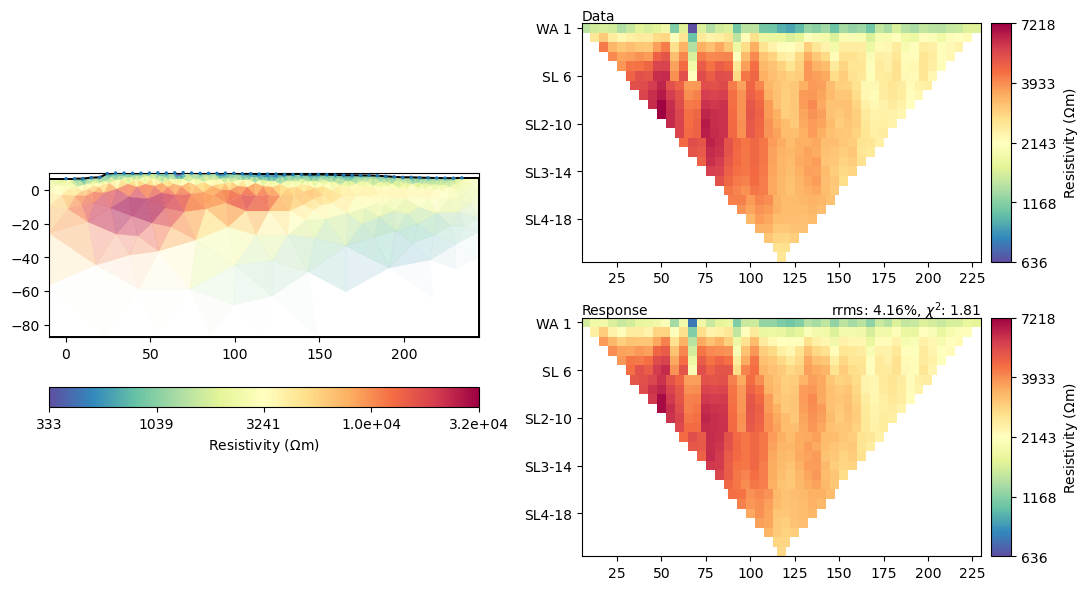

In [20]:
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)

mgr.showResult(coverage=1)
mgr.showResultAndFit()

21/05/24 - 13:43:24 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

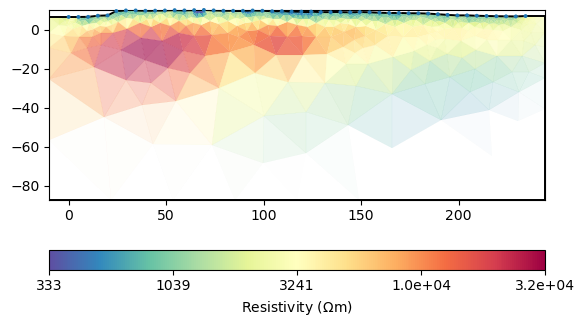

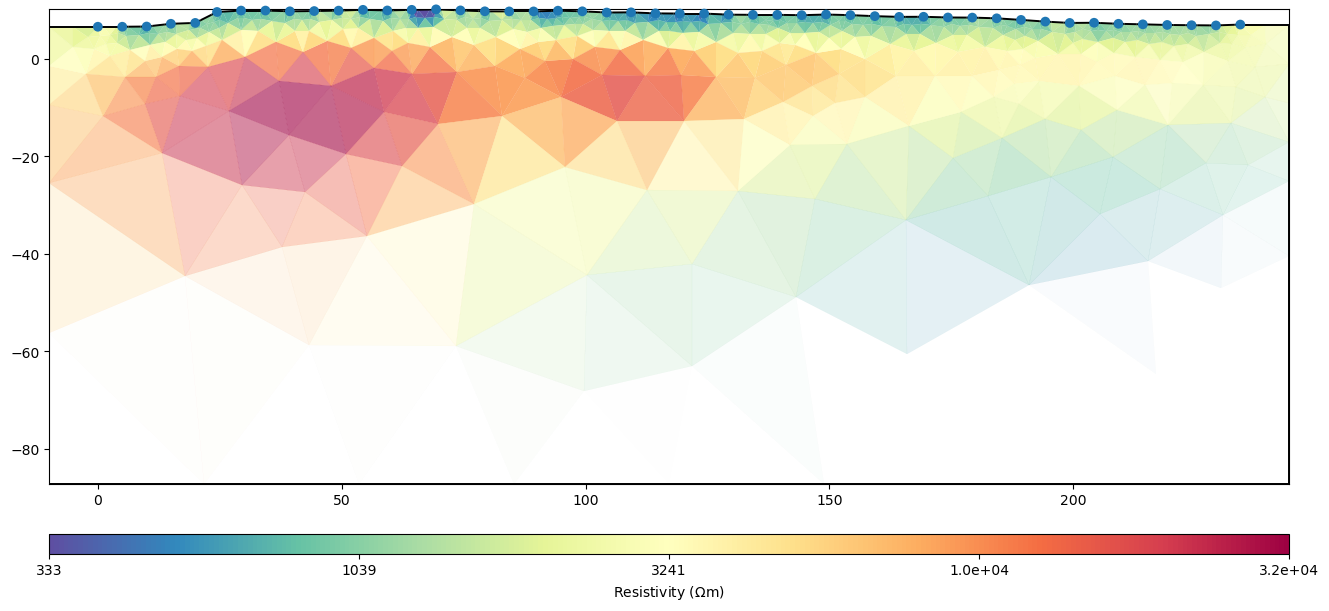

In [21]:
mgr.showResult(cMap="Spectral_r", logScale=True)
mgr.saveResult(dir+ 'pygimli/all_inversions')

(-40.0, 11.141096614746566)

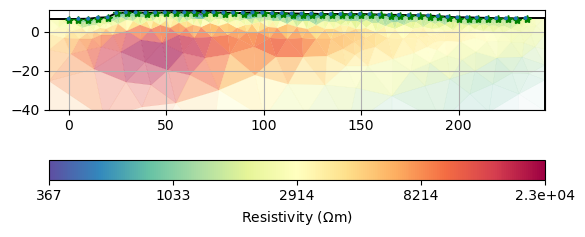

In [18]:
from pygimli.viewer.mpl import draw1DColumn

AL = np.loadtxt(dir + "pygimli/AL_eastern_parallel_to_shore.txt")

x_AL = AL[:, 0]
z_AL = AL[:, 1]

ax, cb = mgr.showResult()
#ax.plot(ibpt_x, ibpt_depth_smoothed, ":", linewidth=1, color='black')
ax.plot(x_AL, z_AL, 'g*', linewidth=0.5)
ax.grid(True)
ax.set_ylim(-40)